<a href="https://colab.research.google.com/github/Abhishekpratapsingh321/Income_census_prediction/blob/main/income_census_dataset_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing important libraries

In [1]:
from google.colab import files
import io
import requests
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10,8]
import pdb
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold, RepeatedKFold
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV

Feature Information:

1:  age: continuous.

2:  workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, 
State-gov, Without-pay, Never-worked.

3:  fnlwgt: continuous.

4:  education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

5:  education-num: continuous.

6:  marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

7:  occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

8:  relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

9:  race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

10:  sex: Female, Male.

11:  capital-gain: continuous.

12:  capital-loss: continuous.

13:  hours-per-week: continuous.

14:  native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

15:  income: >50K, <=50K.


Loading Training Dataset and creating dataframe

In [2]:

df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain',	'capital-loss',	'hours-per-week',	'native-country',	'income'])


Loading Test Dataset and creating Dataframe

In [3]:
df_test=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test",names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain',	'capital-loss',	'hours-per-week',	'native-country',	'income'])


In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.


In [6]:
df_test=df_test.drop([0],axis=0) #here we are dropping the first row as its is in wrong format

In [7]:
df_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
df_test.info() #here we can see that age datatype is object so we have to convert it into int64 form

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16281 entries, 1 to 16281
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             16281 non-null  object 
 1   workclass       16281 non-null  object 
 2   fnlwgt          16281 non-null  float64
 3   education       16281 non-null  object 
 4   education-num   16281 non-null  float64
 5   marital-status  16281 non-null  object 
 6   occupation      16281 non-null  object 
 7   relationship    16281 non-null  object 
 8   race            16281 non-null  object 
 9   sex             16281 non-null  object 
 10  capital-gain    16281 non-null  float64
 11  capital-loss    16281 non-null  float64
 12  hours-per-week  16281 non-null  float64
 13  native-country  16281 non-null  object 
 14  income          16281 non-null  object 
dtypes: float64(5), object(10)
memory usage: 2.0+ MB


In [10]:
df_test['age']=pd.to_numeric(df_test['age'])

# EDA step

## Training dataset

Types of features




*   Numerical features (6 features, int64): age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week

*   Categorical features (9 features, object(str)): workclass, education, marital-status, occupation, relationship, race, sex, native-country, income



Missing Data



*   There are no null data in any of the dataset columns.

*   However, there are unknown data (information) in some columns indicated by the symbol '?'.



In [11]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

## Testing Dataset

Missing data:



*  There are no null data in any of the dataset columns.

*  However, there are missing or wrong data in some columns indicated by the symbol '?'. 



This dataset will be only used in the testing step to evaluate the performance of the proposed ML models trained over the train dataset in the training step.

In [13]:
df_test.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [14]:
df_test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

##    Feature analysis

The analysis conducted in this block are performed on the training dataset, which will be used to fit the ML models.

### Target feature **income**

It defines whether a person makes over $50K a year (class >50K) or not (class <=50) based on census data.

In [15]:
def categorical_feature_analysis(df, var_name):
  ##var_name is the feature to be analyzed
  print('Data values by class of feature %s:\n%s\n' % (var_name, df[var_name].value_counts(dropna=False))) #total feature values by category
  print('Percentage of data values by class of feature %s:\n%s\n' % (var_name, df[var_name].value_counts(normalize=True, dropna=False))) #percentage of total feature values by category
  print('Unique values of feature %s:\n%s\n'  % (var_name, df[var_name].unique())) #feature's unique values

In [16]:
var='income'
categorical_feature_analysis(df, var)

Data values by class of feature income:
 <=50K    24720
 >50K      7841
Name: income, dtype: int64

Percentage of data values by class of feature income:
 <=50K    0.75919
 >50K     0.24081
Name: income, dtype: float64

Unique values of feature income:
[' <=50K' ' >50K']



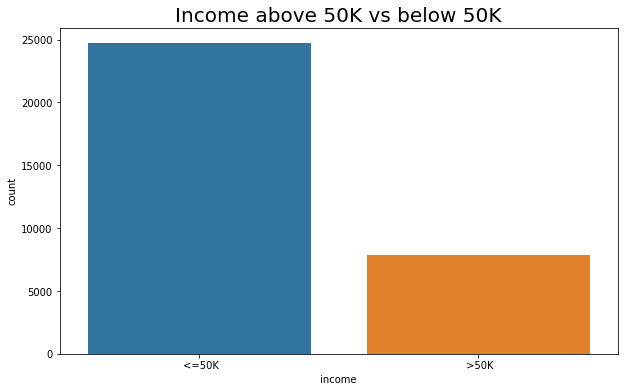

In [17]:
##plot distribution
plt.figure(figsize=(10,6))
plt.title("Income above 50K vs below 50K", fontsize=20)
ax = sns.countplot(x='income', data=df)




*   Unbalanced data values, where 76% (24720) of people make less or equal to  a year, and 24% (7841) of people make over  a year.

*     Such imbalance might be caused by specific features that tend to influence the increase/decrease the annual income more significantly. For example, feature age may reflect on work experience and seniority of the position.

In [18]:
def continuous_feature_analysis(df, var_name):
  ##var_name is the feature to be analyzed
  print('Distribution of data values of feature %s:\n%s\n' % (var_name, df[var_name].value_counts(dropna=False))) #distribution of feature values
  print('Percentage of data distribution of feature %s:\n%s\n' % (var_name, df[var_name].value_counts(normalize=True, dropna=False))) #percentage of distribution of feature values
  #print('Unique values of feature %s (sorted) (%i):\n%s\n'  % (var_name, len(df[var_name].unique()), sorted(df[var_name].unique()))) #feature's unique values
  print('Total unique values of feature %s: %i\n'  % (var_name, len(df[var_name].unique()))) #feature's unique values
  display(df[var].describe())

### Feature **age**

In [19]:
var='age'
continuous_feature_analysis(df, var)

Distribution of data values of feature age:
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64

Percentage of data distribution of feature age:
36    0.027579
31    0.027272
34    0.027210
23    0.026934
35    0.026903
        ...   
83    0.000184
88    0.000092
85    0.000092
86    0.000031
87    0.000031
Name: age, Length: 73, dtype: float64

Total unique values of feature age: 73



count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

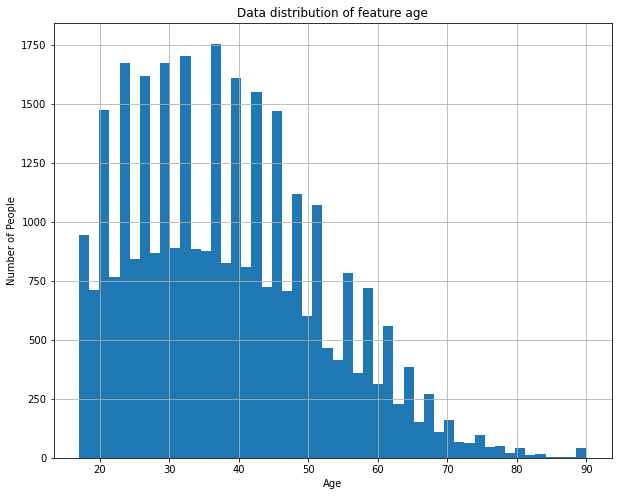

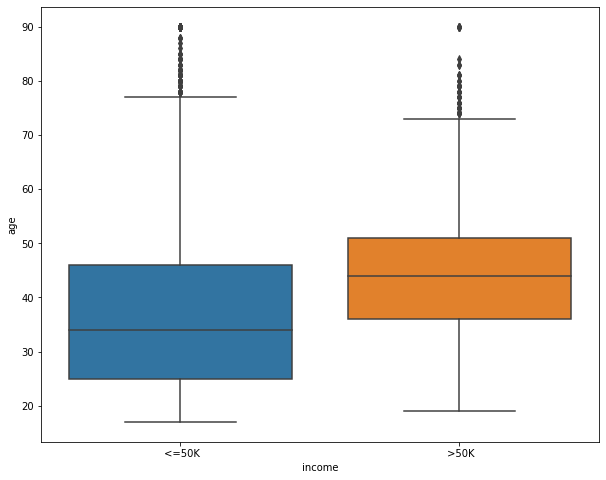

In [20]:
ax=df[var].hist(bins=50)
ax.set_title('Data distribution of feature '+var)
ax.set_ylabel('Number of People')
ax.set_xlabel('Age')
plt.show()

sns.boxplot(y='age', x='income', data=df)
plt.show()

*   Numerical feature with values ranging from 17 to 90 years.
*   Unbalanced data distribuiton, with greater concentration of people aged between 28 and 48 years.
*   Age values present an average of 38.58 years and median of 37 years.
*   25% of people are under 28 years old and 75% of people have less than 48 years old.
*   Regarding the relationship between ages and incomes, we note that older   people tend to make over $50k a year, whereas younger people tend to make less or equal to $50k

###  Feature **fnlwgt**
It represents the estimated final weight of each person assigned by the Census Bureau. The weight means that if two samples share similar fnlwgt, they also share similar characteristics.

In [21]:
var='fnlwgt'
continuous_feature_analysis(df, var)

Distribution of data values of feature fnlwgt:
164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name: fnlwgt, Length: 21648, dtype: int64

Percentage of data distribution of feature fnlwgt:
164190    0.000399
203488    0.000399
123011    0.000399
148995    0.000369
121124    0.000369
            ...   
232784    0.000031
325573    0.000031
140176    0.000031
318264    0.000031
257302    0.000031
Name: fnlwgt, Length: 21648, dtype: float64

Total unique values of feature fnlwgt: 21648



count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64

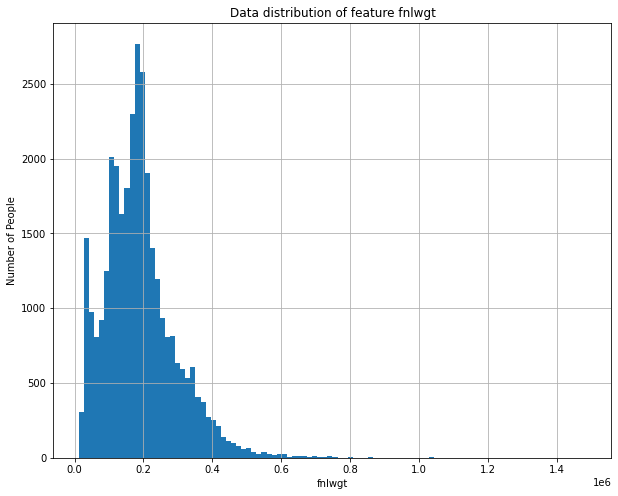

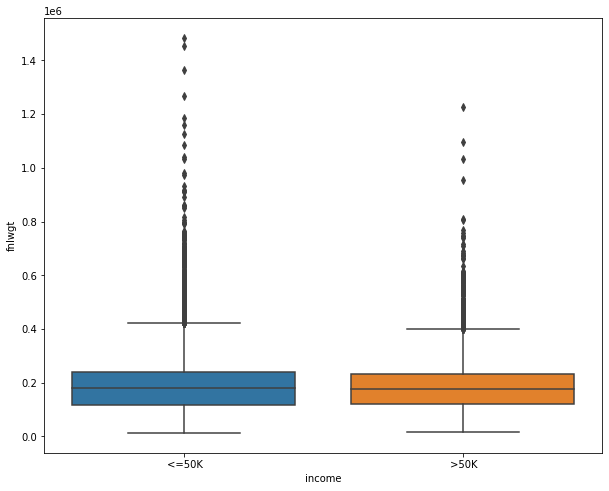

In [22]:
ax=df[var].hist(bins=100)
ax.set_title('Data distribution of feature '+var)
ax.set_ylabel('Number of People')
ax.set_xlabel('fnlwgt')
plt.show()

sns.boxplot(y='fnlwgt', x='income', data=df)
plt.show()

*   Numerical feature with large scale values, and almost a distinct value to each person.

* No missing or null data.

* Regarding the relationship between features fnlwgt and income, we note that the boxplots for both classes of the target feature regarding the data distribution of fnlwgt did not show notable differences.

* This may indicate that fnlwgt is not so useful for the model.

* We also note outliers in both classes of the target regarding the values of fnlwgt.

Feature **education**

In [23]:
var="education"
categorical_feature_analysis(df,var)

Data values by class of feature education:
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

Percentage of data values by class of feature education:
 HS-grad         0.322502
 Some-college    0.223918
 Bachelors       0.164461
 Masters         0.052916
 Assoc-voc       0.042443
 11th            0.036086
 Assoc-acdm      0.032769
 10th            0.028654
 7th-8th         0.019840
 Prof-school     0.017690
 9th             0.015786
 12th            0.013298
 Doctorate       0.012684
 5th-6th         0.010227
 1st-4th         0.005160
 Preschool       0.001566
Name: education, dtype: float64

Unique values of feature education:
[' Bachelors' ' 

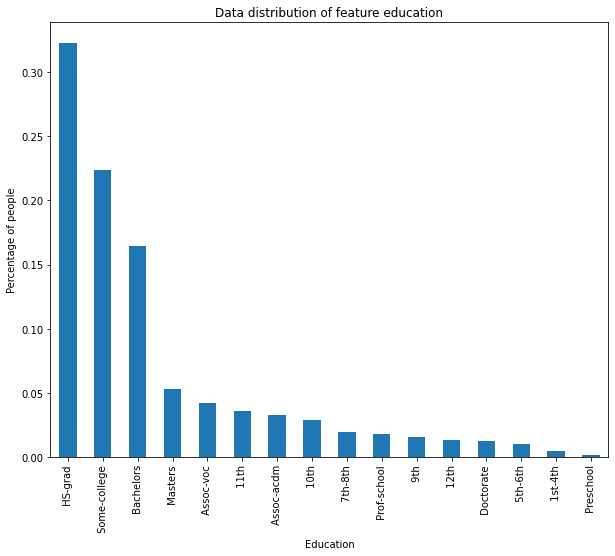

In [24]:
##plot distribution
ax=df[var].value_counts(normalize=True).plot.bar()
ax.set_title('Data distribution of feature '+var)
ax.set_ylabel('Percentage of people')
ax.set_xlabel('Education')
ax.set_xticklabels(labels=[' HS-grad', ' Some-college', ' Bachelors', ' Masters', ' Assoc-voc', ' 11th', ' Assoc-acdm', ' 10th', ' 7th-8th', ' Prof-school', ' 9th', ' 12th', ' Doctorate', ' 5th-6th', ' 1st-4th', ' Preschool'])
plt.show()


Percentage of people with HS-grad that makes >$50K/yr:  5.144190903227788
Percentage of people with some college degree that makes >$50K/yr:  0.0
Percentage of people with bachelors that makes >$50K/yr:  6.821043579742637
Percentage of people with doctorate degree that makes >$50K/yr:  0.9397745769478825


income,<=50K,>50K
education,,
10th,0.933548,0.066452
11th,0.948936,0.051064
12th,0.923788,0.076212
1st-4th,0.964286,0.035714
5th-6th,0.951952,0.048048
7th-8th,0.938080,0.061920
9th,0.947471,0.052529
Assoc-acdm,0.751640,0.248360
Assoc-voc,0.738784,0.261216


Text(0, 0.5, 'Percentage of People (normalized by class)')

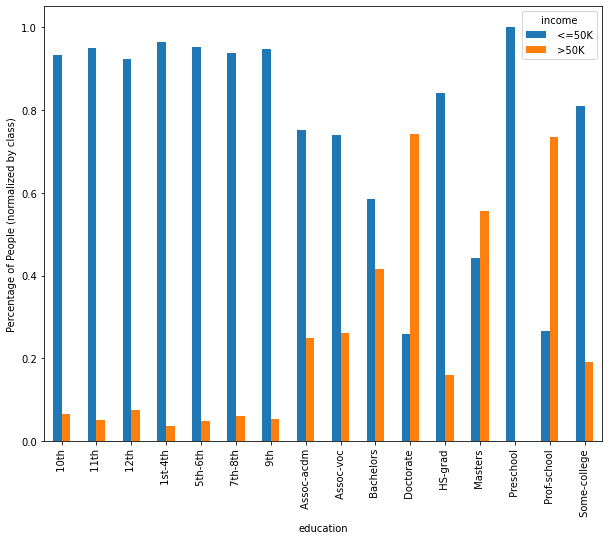

In [25]:
print('Percentage of people with HS-grad that makes >$50K/yr: ', len(df[(df['education']==' HS-grad') & (df['income']==' >50K')])/len(df)*100)
print('Percentage of people with some college degree that makes >$50K/yr: ', len(df[(df['education']=='Some-college') & (df['income']==' >50K')])/len(df)*100)
print('Percentage of people with bachelors that makes >$50K/yr: ', len(df[(df['education']==' Bachelors') & (df['income']==' >50K')])/len(df)*100)
print('Percentage of people with doctorate degree that makes >$50K/yr: ', len(df[(df['education']==' Doctorate') & (df['income']==' >50K')])/len(df)*100)

#pd.crosstab([train_data['education'], train_data['workclass']], train_data['income'], normalize='index')
display(pd.crosstab([df['education']], df['income'], normalize='index'))

pd.crosstab([df['education']], df['income'], normalize='index').plot.bar()
plt.ylabel('Percentage of People (normalized by class)')

*  Categorical feature with 16 distinct categories of education.

*  Unbalanced data values, where 32.3% (10501) of people have only the high school graduation (HS-grad), followed by 22.4% (7291) of people that have some college degree, and 16.4% (5355) of people that have bachelor's degree.

* This 3 classes together represent 71.1% of the data.

* On the contrary, only 1.27% (413) of people have doctorate degree.

* We note that some classes seem to mean the same education degree, e.g., HS-grad and 9th are related to the high school graduation. Perhaps such classes could be grouped in a single class.

* Regarding the relationship between features education and income:

* Only 5.14% out of 32.3% of people with HS-grad make over .

* 4.26% out of 22.4% of people with some college degree make over .

* 6.82% out of 16.4% of people with bachelors degree make over .

* 0.94% out of 1.27% of people with doctorate degree make over .

* Such relation may indicate that people with higher level education are more likely to make over  when compared to other classes, e.g., masters and doctorate degrees (see crosstab).

###  Feature **education-num**

In [29]:
var="education-num"
continuous_feature_analysis(df,var)

Distribution of data values of feature education-num:
9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education-num, dtype: int64

Percentage of data distribution of feature education-num:
9     0.322502
10    0.223918
13    0.164461
14    0.052916
11    0.042443
7     0.036086
12    0.032769
6     0.028654
4     0.019840
15    0.017690
5     0.015786
8     0.013298
16    0.012684
3     0.010227
2     0.005160
1     0.001566
Name: education-num, dtype: float64

Total unique values of feature education-num: 16



count    32561.000000
mean        10.080679
std          2.572720
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education-num, dtype: float64

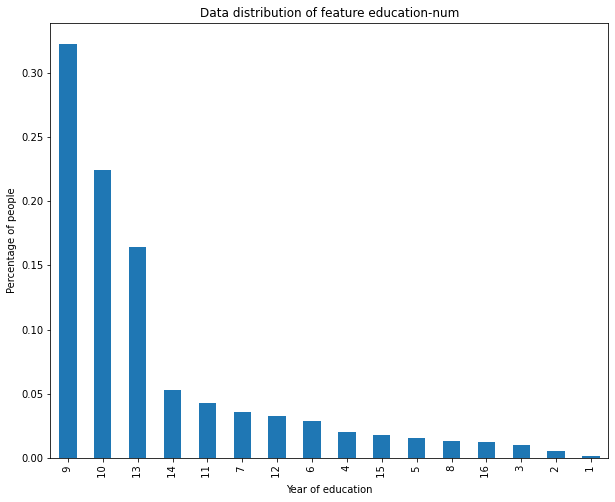

In [34]:
ax=df[var].value_counts(normalize=True).plot.bar()
ax.set_title("Data distribution of feature "+var)
ax.set_ylabel("Percentage of people")
ax.set_xlabel("Year of education")
ax.set_xticklabels(labels=[' 9', ' 10', ' 13', ' 14', ' 11', ' 7', ' 12', ' 6', ' 4', ' 15', ' 5', ' 8', ' 16', ' 3', ' 2', ' 1'])
plt.show()


<function matplotlib.pyplot.show(*args, **kw)>

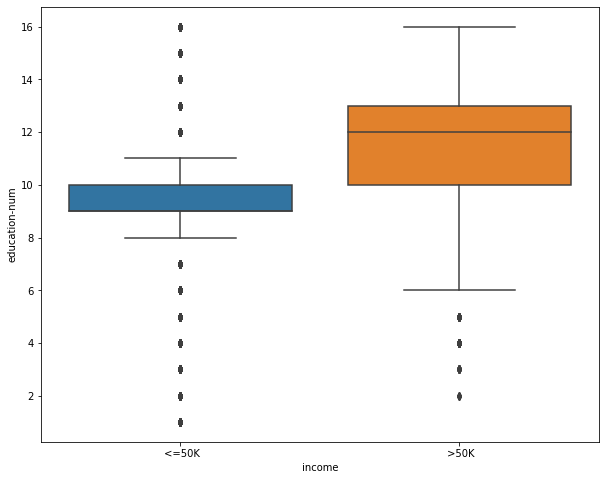

In [37]:
sns.boxplot(y="education-num",x="income",data=df)
plt.show

income,<=50K,>50K
education-num,,
1,1.000000,0.000000
2,0.964286,0.035714
3,0.951952,0.048048
4,0.938080,0.061920
5,0.947471,0.052529
6,0.933548,0.066452
7,0.948936,0.051064
8,0.923788,0.076212
9,0.840491,0.159509


Text(0, 0.5, 'Percentage of People (normalized by class)')

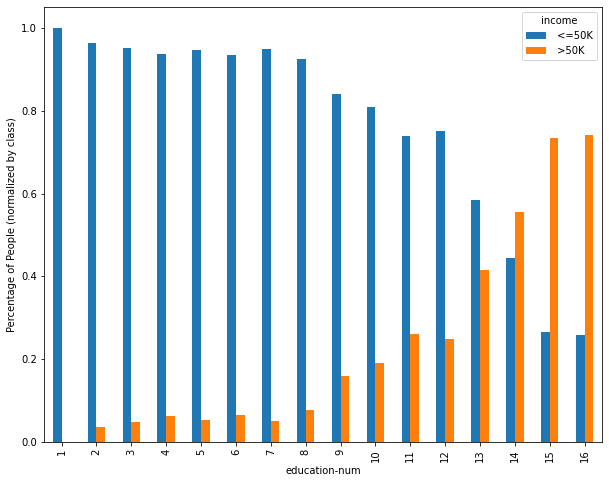

In [38]:
display(pd.crosstab([df['education-num']], df['income'], normalize='index'))

pd.crosstab([df['education-num']], df['income'], normalize='index').plot.bar()
plt.ylabel('Percentage of People (normalized by class)')

### Feature **workclass**
       It defines the work sector of each person





Data values by class of feature workclass:
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

Percentage of data values by class of feature workclass:
 Private             0.697030
 Self-emp-not-inc    0.078038
 Local-gov           0.064279
 ?                   0.056386
 State-gov           0.039864
 Self-emp-inc        0.034274
 Federal-gov         0.029483
 Without-pay         0.000430
 Never-worked        0.000215
Name: workclass, dtype: float64

Unique values of feature workclass:
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']



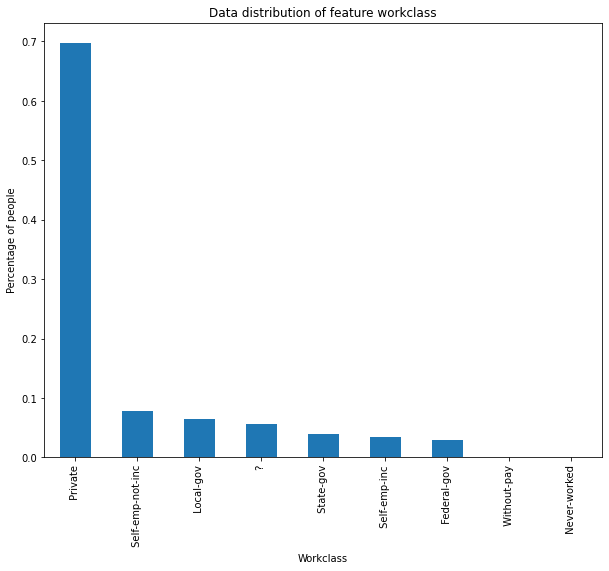

Percentage of people from the private sector that makes >$50K/yr:  15.24216086729523
Percentage of people from the private sector that makes <$50K/yr:  54.460858081754246
Percentage of people from the other sectors that makes >$50K/yr:  8.838794877307208
Percentage of people from the other sectors that makes <=$50K/yr:  21.458186173643316


income,<=50K,>50K
workclass,,
?,0.895969,0.104031
Federal-gov,0.613542,0.386458
Local-gov,0.705208,0.294792
Never-worked,1.000000,0.000000
Private,0.781327,0.218673
Self-emp-inc,0.442652,0.557348
Self-emp-not-inc,0.715073,0.284927
State-gov,0.728043,0.271957
Without-pay,1.000000,0.000000


Text(0, 0.5, 'Percentage of People (normalized by class)')

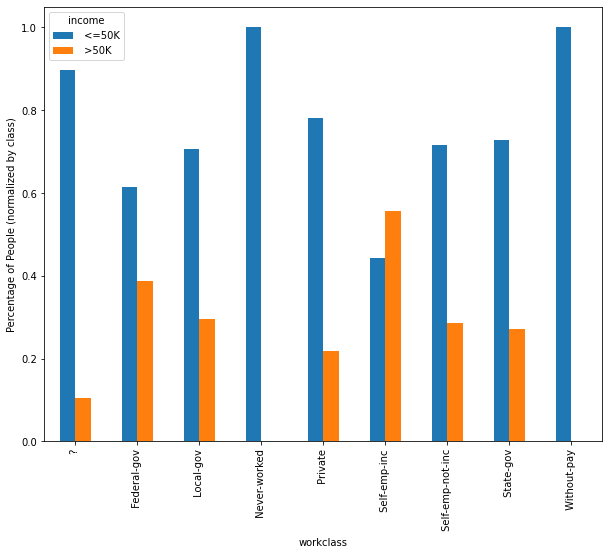

In [41]:
var='workclass'
categorical_feature_analysis(df, var)

##plot distribution
ax=df[var].value_counts(normalize=True).plot.bar()
ax.set_title('Data distribution of feature '+var)
ax.set_ylabel('Percentage of people')
ax.set_xlabel('Workclass')
ax.set_xticklabels(labels=[' Private', ' Self-emp-not-inc', ' Local-gov', ' ?', ' State-gov', ' Self-emp-inc', ' Federal-gov', ' Without-pay', ' Never-worked'])
plt.show()
print('Percentage of people from the private sector that makes >$50K/yr: ', len(df[(df['workclass']==' Private') & (df['income']==' >50K')])/len(df)*100)
print('Percentage of people from the private sector that makes <$50K/yr: ', len(df[(df['workclass']==' Private') & (df['income']==' <=50K')])/len(df)*100)
print('Percentage of people from the other sectors that makes >$50K/yr: ', len(df[(df['workclass']!=' Private') & (df['income']==' >50K')])/len(df)*100)
print('Percentage of people from the other sectors that makes <=$50K/yr: ', len(df[(df['workclass']!=' Private') & (df['income']==' <=50K')])/len(df)*100)

display(pd.crosstab([df['workclass']], df['income'], normalize='index'))

pd.crosstab([df['workclass']], df['income'], normalize='index').plot.bar()
plt.ylabel('Percentage of People (normalized by class)')

* Categorical feature with 9 classes.

* No missing or null data. But there is a class '?', which may indicate that the work sector is unknown.

* Unbalanced data values, where 69.7% (22696) of people work in the private sector. The rest of the data is similarly distributed among the other classes, except classes Without-pay (14 entries) and Never-worked (7 entries).

* Regarding the relationship between features workclass and income:

* Only 15.24% out of 69.7% of people from the private sector make over $50k/yr .

* 8.84% out of 30.3% from the other sectors make over  $50k/yr.

* Such relation may indicate that people from the other sectors (not all of them) tend to make over  $50k/yr , or at least their work sectors contibute alongside the other features to this end (see crosstab).

* On the contrary, given the percentages, people from the private sector tend to make less or equal to  $50k/yr. We note that other features may support people from this work sector to make over $50k/yr .

###  Feature **marital-status**


Data values by class of feature marital-status:
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

Percentage of data values by class of feature marital-status:
 Married-civ-spouse       0.459937
 Never-married            0.328092
 Divorced                 0.136452
 Separated                0.031479
 Widowed                  0.030497
 Married-spouse-absent    0.012837
 Married-AF-spouse        0.000706
Name: marital-status, dtype: float64

Unique values of feature marital-status:
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']



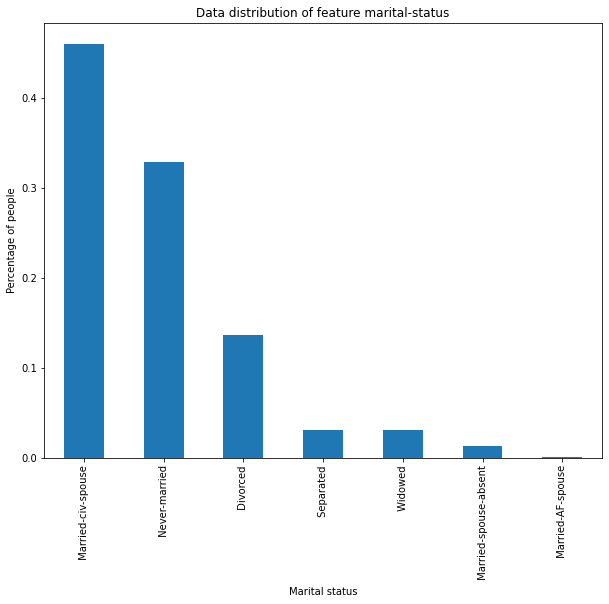

income,<=50K,>50K
marital-status,,
Divorced,0.895791,0.104209
Married-AF-spouse,0.565217,0.434783
Married-civ-spouse,0.553152,0.446848
Married-spouse-absent,0.918660,0.081340
Never-married,0.954039,0.045961
Separated,0.935610,0.064390
Widowed,0.914401,0.085599


Text(0, 0.5, 'Percentage of People (normalized by class)')

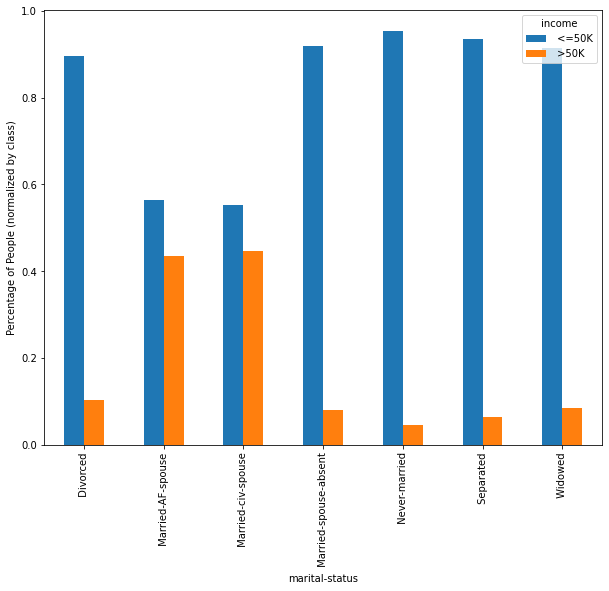

In [43]:
var='marital-status'
categorical_feature_analysis(df, var)

##plot distribution
ax=df[var].value_counts(normalize=True).plot.bar()
ax.set_title('Data distribution of feature '+var)
ax.set_ylabel('Percentage of people')
ax.set_xlabel('Marital status')
ax.set_xticklabels(labels=[' Married-civ-spouse', ' Never-married', ' Divorced', ' Separated', ' Widowed', ' Married-spouse-absent', ' Married-AF-spouse'])
plt.show()

display(pd.crosstab([df['marital-status']], df['income'], normalize='index'))

pd.crosstab([df['marital-status']], df['income'], normalize='index').plot.bar()
plt.ylabel('Percentage of People (normalized by class)')

* Categorical feature with 7 distinct categories of marital status.

* No missing or null data.

* Unbalanced data values, where 45.99% (14976) of people have civilian spouse (Married-civ-spouse), followed by 32.8% (10683) of people that have never been married, and 13.6% (4443) of people that are divorced.

* These 3 classes together represent 92.39% of the data.

* We note that people with civilian spouse (Married-civ-spouse) or with spouse in the Armed Forces (Married-AF-spouse) are more likely to make over $50k/yr  when compared to other categories (see crosstab).

Feature **relationship**


Data values by class of feature relationship:
 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

Percentage of data values by class of feature relationship:
 Husband           0.405178
 Not-in-family     0.255060
 Own-child         0.155646
 Unmarried         0.105832
 Wife              0.048156
 Other-relative    0.030128
Name: relationship, dtype: float64

Unique values of feature relationship:
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']



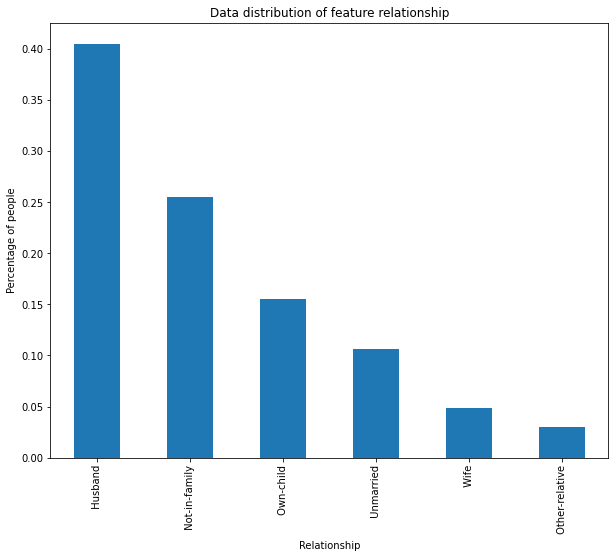

income,<=50K,>50K
relationship,,
Husband,0.551429,0.448571
Not-in-family,0.896930,0.103070
Other-relative,0.962283,0.037717
Own-child,0.986780,0.013220
Unmarried,0.936738,0.063262
Wife,0.524872,0.475128


Text(0, 0.5, 'Percentage of People (normalized by class)')

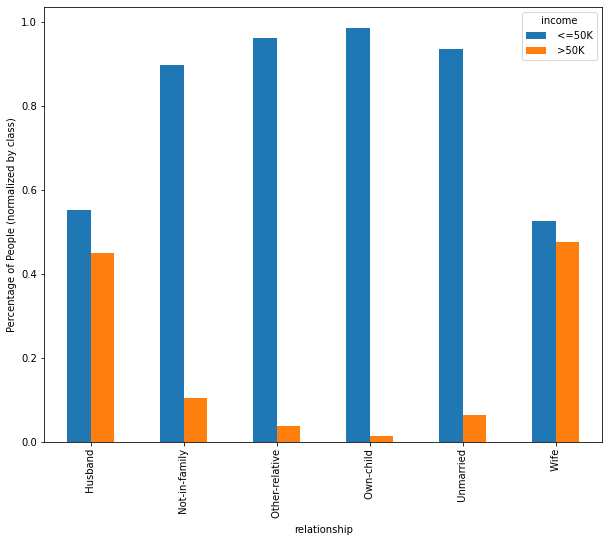

In [44]:
var='relationship'
categorical_feature_analysis(df, var)

##plot distribution
ax=df[var].value_counts(normalize=True).plot.bar()
ax.set_title('Data distribution of feature '+var)
ax.set_ylabel('Percentage of people')
ax.set_xlabel('Relationship')
ax.set_xticklabels(labels=[' Husband', ' Not-in-family', ' Own-child', ' Unmarried', ' Wife', ' Other-relative'])
plt.show()

display(pd.crosstab([df['relationship']], df['income'], normalize='index'))

pd.crosstab([df['relationship']], df['income'], normalize='index').plot.bar()
plt.ylabel('Percentage of People (normalized by class)')


* Categorical feature with 6 distinct classes of relationship.

* No missing or null data.

* Unbalanced data values, where 40.5% (13193) of people are the husbands, while only 4.8% (1568) are the wives.

* However, we note that people which are husbands or wives are more likely to make over $50k/yr when compared to other categories (see crosstab).

* This corroborates the previous analysis on the feature marital-status, where people with civilian spouse (Married-civ-spouse) or with spouse in the Armed Forces (Married-AF-spouse) are more likely to make over $50k/yr when compared to other categories.

## Feature **race**

Data values by class of feature race:
 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

Percentage of data values by class of feature race:
 White                 0.854274
 Black                 0.095943
 Asian-Pac-Islander    0.031909
 Amer-Indian-Eskimo    0.009551
 Other                 0.008323
Name: race, dtype: float64

Unique values of feature race:
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']



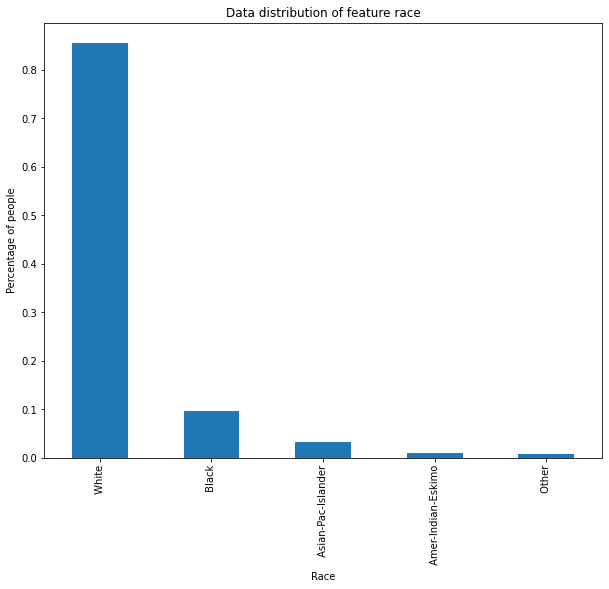

income,<=50K,>50K
race,,
Amer-Indian-Eskimo,0.884244,0.115756
Asian-Pac-Islander,0.734360,0.265640
Black,0.876120,0.123880
Other,0.907749,0.092251
White,0.744140,0.255860


Text(0, 0.5, 'Percentage of People (normalized by class)')

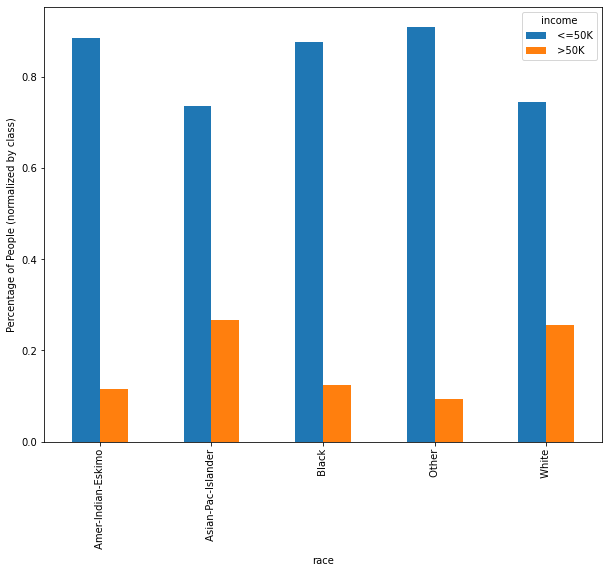

In [45]:
var='race'
categorical_feature_analysis(df, var)

##plot distribution
ax=df[var].value_counts(normalize=True).plot.bar()
ax.set_title('Data distribution of feature '+var)
ax.set_ylabel('Percentage of people')
ax.set_xlabel('Race')
ax.set_xticklabels(labels=[' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other'])
plt.show()

display(pd.crosstab([df['race']], df['income'], normalize='index'))

pd.crosstab([df['race']], df['income'], normalize='index').plot.bar()
plt.ylabel('Percentage of People (normalized by class)')

* Categorical feature with 5 categories of race.

* No missing or null data.

* Very unbalanced data values, where 85.4% (27816) of people are white, followed by 9.6% (3124) of black people.

* Considering the large number of white people compared to other races, it's not possible to note a clear trend that these people are more likely to make over $50k/yr.

### Feature **sex**

Data values by class of feature sex:
 Male      21790
 Female    10771
Name: sex, dtype: int64

Percentage of data values by class of feature sex:
 Male      0.669205
 Female    0.330795
Name: sex, dtype: float64

Unique values of feature sex:
[' Male' ' Female']



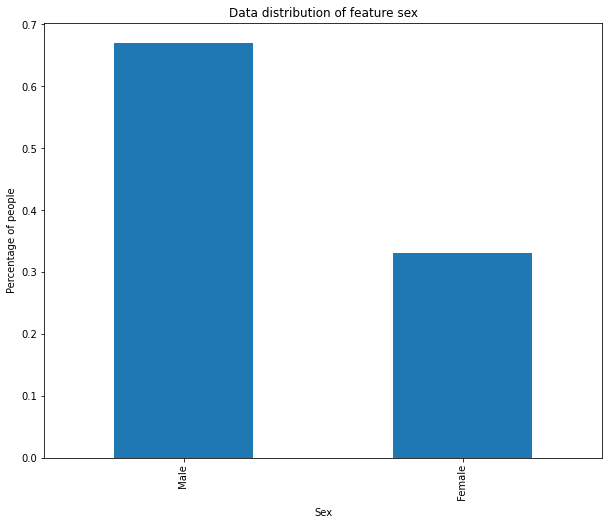

income,<=50K,>50K
sex,,
Female,0.890539,0.109461
Male,0.694263,0.305737


Text(0, 0.5, 'Percentage of People (normalized by class)')

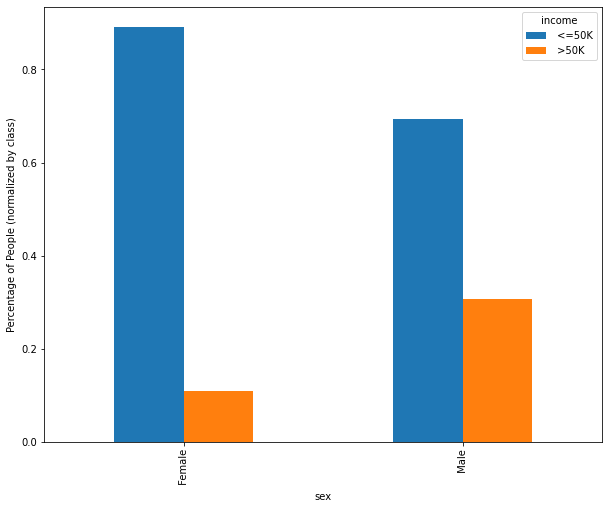

In [46]:
var='sex'
categorical_feature_analysis(df, var)

##plot distribution
ax=df[var].value_counts(normalize=True).plot.bar()
ax.set_title('Data distribution of feature '+var)
ax.set_ylabel('Percentage of people')
ax.set_xlabel('Sex')
ax.set_xticklabels(labels=[' Male', ' Female'])
plt.show()

display(pd.crosstab([df['sex']], df['income'], normalize='index'))

pd.crosstab([df['sex']], df['income'], normalize='index').plot.bar()
plt.ylabel('Percentage of People (normalized by class)')

* Categorical feature with 2 distinct classes.

* No missing or null data.

* Unbalanced data values, where 66.9% (21790) of people are male and 33.1% (10771) of people are female.

* Besides the higher number of male compared to female, we observe that male are more likely to make over $50k/yr (see crosstab).

## Feature **capital-gain**
  Capital gain refers to an increase in a capital asset's value and is considered to be realized when the asset is sold.

Distribution of data values of feature capital-gain:
0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: capital-gain, Length: 119, dtype: int64

Percentage of data distribution of feature capital-gain:
0        0.916710
15024    0.010657
7688     0.008722
7298     0.007555
99999    0.004883
           ...   
1111     0.000031
2538     0.000031
22040    0.000031
4931     0.000031
5060     0.000031
Name: capital-gain, Length: 119, dtype: float64

Total unique values of feature capital-gain: 119



count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

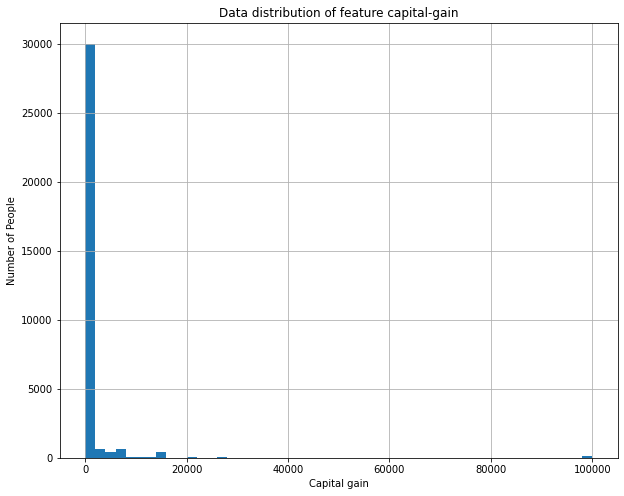

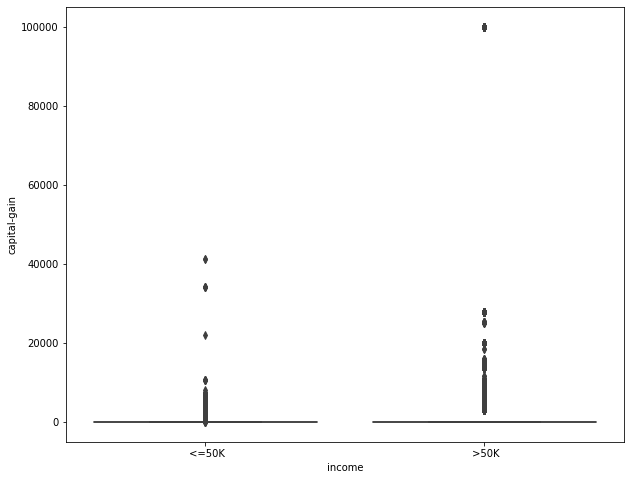

In [47]:
var='capital-gain'
continuous_feature_analysis(df, var)

ax=df[var].hist(bins=50)
ax.set_title('Data distribution of feature '+var)
ax.set_ylabel('Number of People')
ax.set_xlabel('Capital gain')
plt.show()

sns.boxplot(y='capital-gain', x='income', data=df)
plt.show()

* Numerical feature with outliers.

* No missing or null data.

* Regarding the relationship between capital gain and annual income, we note that the boxplots for both classes of the target feature regarding the data distribution of capital-gain did not show notable differences.

* Balanced data distribuiton, with greater concentration of people with no capital gain.

* At least 75% of people had no capital gain.

* Both boxplots present outliers regarding this feature.

## Feature **capital-loss**
Capital loss is the loss incurred when a capital asset decreases in value and is considered to be realized when the asset is sold.

Distribution of data values of feature capital-loss:
0       31042
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: capital-loss, Length: 92, dtype: int64

Percentage of data distribution of feature capital-loss:
0       0.953349
1902    0.006204
1977    0.005160
1887    0.004883
1848    0.001566
          ...   
2080    0.000031
1539    0.000031
1844    0.000031
2489    0.000031
1411    0.000031
Name: capital-loss, Length: 92, dtype: float64

Total unique values of feature capital-loss: 92



count    32561.000000
mean        87.303830
std        402.960219
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64

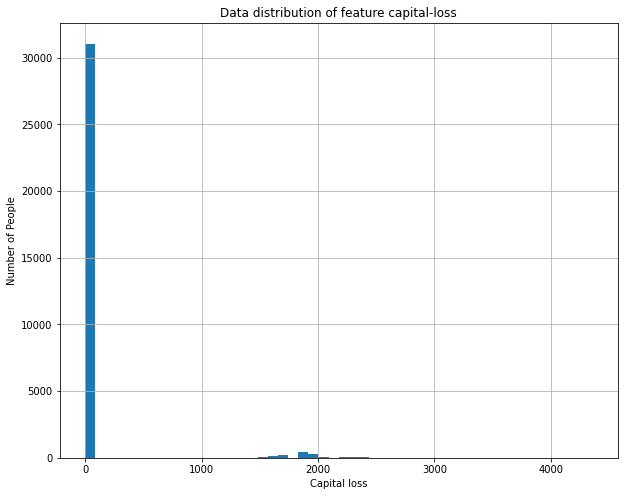

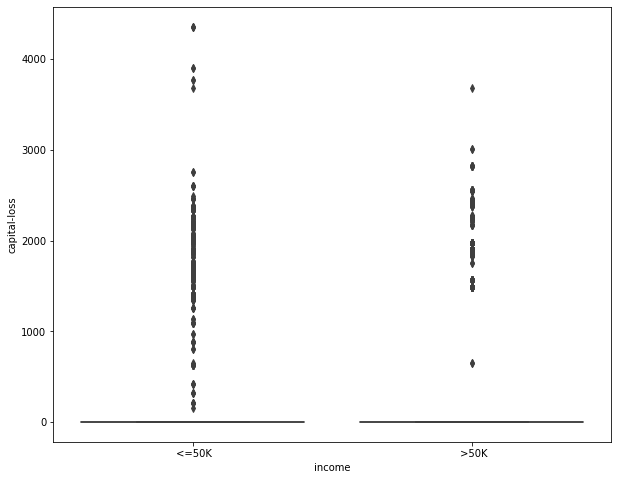

In [48]:
var='capital-loss'
continuous_feature_analysis(df, var)

ax=df[var].hist(bins=50)
ax.set_title('Data distribution of feature '+var)
ax.set_ylabel('Number of People')
ax.set_xlabel('Capital loss')
plt.show()

sns.boxplot(y='capital-loss', x='income', data=df)
plt.show()


* Numerical feature with outliers.

* No missing or null data.

* The considerations about this feature follows the previous one.

## Feature **hours-per-week**
Working hours per week.

Distribution of data values of feature hours-per-week:
40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
82        1
92        1
87        1
74        1
94        1
Name: hours-per-week, Length: 94, dtype: int64

Percentage of data distribution of feature hours-per-week:
40    0.467338
50    0.086576
45    0.056018
60    0.045300
35    0.039833
        ...   
82    0.000031
92    0.000031
87    0.000031
74    0.000031
94    0.000031
Name: hours-per-week, Length: 94, dtype: float64

Total unique values of feature hours-per-week: 94



count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

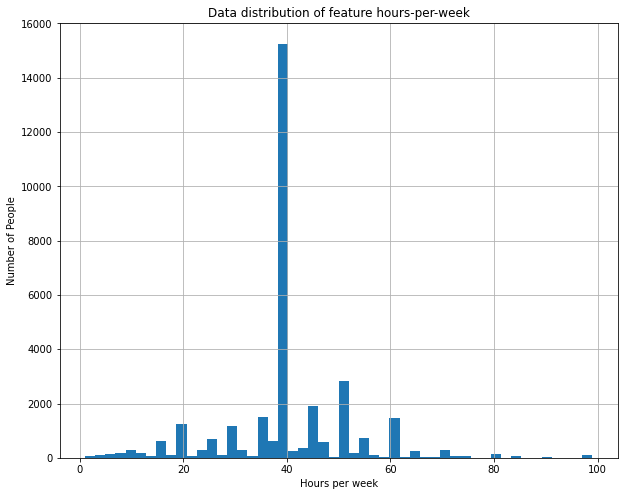

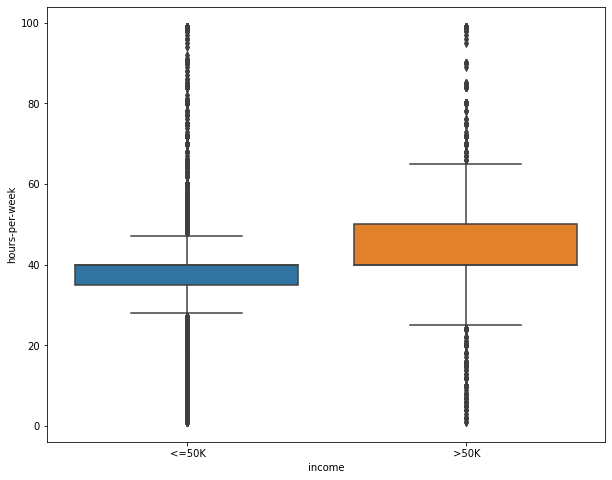

Percentage of people that work less than 40 hours per week and makes >$50K/yr:  2.2665151561684227
Percentage of people that work less than 40 hours per week and makes <=$50K/yr:  21.574890206074752
Percentage of people that work between 40 and 45 hours per week and makes >$50K/yr:  12.659316360062652
Percentage of people that work between 40 and 45 hours per week and makes <=$50K/yr:  41.57427597432511
Percentage of people that work more than 45 hours per week and makes >$50K/yr:  9.155124228371363
Percentage of people that work more than 45 hours per week and makes <=$50K/yr:  12.769878074997695


In [50]:
var='hours-per-week'
continuous_feature_analysis(df, var)

ax=df[var].hist(bins=50)
ax.set_title('Data distribution of feature '+var)
ax.set_ylabel('Number of People')
ax.set_xlabel('Hours per week')
plt.show()

sns.boxplot(y='hours-per-week', x='income', data=df)
plt.show()

print('Percentage of people that work less than 40 hours per week and makes >$50K/yr: ', len(df[(df['hours-per-week']<40) & (df['income']==' >50K')])/len(df)*100)
print('Percentage of people that work less than 40 hours per week and makes <=$50K/yr: ', len(df[(df['hours-per-week']<40) & (df['income']==' <=50K')])/len(df)*100)
print('Percentage of people that work between 40 and 45 hours per week and makes >$50K/yr: ', len(df[((df['hours-per-week'] >= 40) & (df['hours-per-week'] <= 45)) & (df['income']==' >50K')])/len(df)*100)
print('Percentage of people that work between 40 and 45 hours per week and makes <=$50K/yr: ', len(df[((df['hours-per-week'] >= 40) & (df['hours-per-week'] <= 45)) & (df['income']==' <=50K')])/len(df)*100)
print('Percentage of people that work more than 45 hours per week and makes >$50K/yr: ', len(df[(df['hours-per-week'] > 45) & (df['income']==' >50K')])/len(df)*100)
print('Percentage of people that work more than 45 hours per week and makes <=$50K/yr: ', len(df[(df['hours-per-week'] > 45) & (df['income']==' <=50K')])/len(df)*100)

* Numerical feature with outliers.

* No missing or null data.

* Unbalanced data distribuiton, with greater concentration of people working between 40 and 45 hours per week.

* The feature hours-per-week presents an average of 40.44 hours and median of 40 hours.

* Regarding the relationship between working hours per week and annual income, we note that people who work more hours per week tend to make over  a year.

* However, there are cases of people who work more hours per week and make less or equal to  a year, and vice versa.

* We observe that there are outliers in both classes of the target feature regarding the working hours per week, such as 100 hours worked per week.

### Feature **native-country**

Data values by class of feature native-country:
 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                 

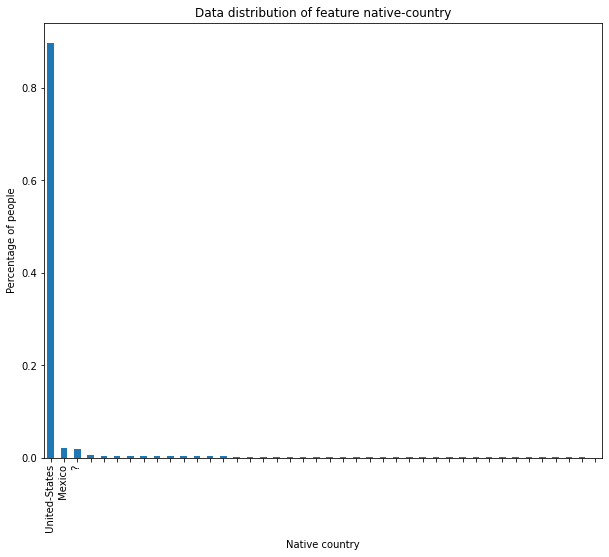

income,<=50K,>50K
native-country,,
?,0.749571,0.250429
Cambodia,0.631579,0.368421
Canada,0.677686,0.322314
China,0.733333,0.266667
Columbia,0.966102,0.033898
Cuba,0.736842,0.263158
Dominican-Republic,0.971429,0.028571
Ecuador,0.857143,0.142857
El-Salvador,0.915094,0.084906


In [51]:
var='native-country'
categorical_feature_analysis(df, var)

##plot distribution
ax=df[var].value_counts(normalize=True).plot.bar()
ax.set_title('Data distribution of feature '+var)
ax.set_ylabel('Percentage of people')
ax.set_xlabel('Native country')
ax.set_xticklabels(labels=[' United-States', ' Mexico', ' ?'])
plt.show()

pd.crosstab([df['native-country']], df['income'], normalize='index')

# Relation between features

## Relation between features sex, race, income and numerical ones:

* On average, it's possible to note that regardless sex and race, people who are older, have a higher education level, had greater capital gains and work more hours per week tend to make over $50k/yr when compared to others.

* This corroborates our previous analysis.

In [52]:
display(df.groupby(['sex', 'race', 'income']).mean())

age         fnlwgt  education-num  \
sex     race                income                                            
 Female  Amer-Indian-Eskimo  <=50K  36.906542  109018.626168       9.392523   
                             >50K   39.000000  148012.000000      12.416667   
         Asian-Pac-Islander  <=50K  34.227723  148165.333333      10.237624   
                             >50K   41.162791  142426.093023      11.465116   
         Black               <=50K  37.624573  213411.580205       9.416382   
                             >50K   41.588889  205806.033333      11.722222   
         Other               <=50K  31.388350  173235.932039       8.689320   
                             >50K   36.666667  160223.333333      12.500000   
         White               <=50K  36.073155  183485.120961       9.902942   
                             >50K   42.281128  184030.255837      11.794747   
 Male    Amer-Indian-Eskimo  <=50K  36.803571  126428.767857       8.851190   
                             >50K   40.041667  120721.541667      10.625000   
         Asian-Pac-Islander  <=50K  37.289130  163885.130435      10.573913   
                             >50K   42.596567  170698.347639      12.570815   
         Black               <=50K  36.124214  242343.990566       9.082547   
                             >50K   44.356902  245390.356902      10.882155   
         Other               <=50K  33.552448  214891.832168       8.468531   
                             >50K   42.947368  204551.736842      11.315789   
         White               <=50K  37.285136  189950.465418       9.467100   
                             >50K   44.739859  186917.770077      11.581376   

                                    capital-gain  capital-loss  hours-per-week  
sex     race                income                                              
 Female  Amer-Indian-Eskimo  <=50K    190.803738     16.084112       35.803738  
                             >50K    3699.333333      0.000000       43.500000  
         Asian-Pac-Islander  <=50K     83.000000     45.613861       37.138614  
                             >50K    5678.837209     87.767442       39.558140  
         Black               <=50K    106.800000     41.005461       36.491468  
                             >50K    7187.122222    117.811111       42.411111  
         Other               <=50K     45.582524     38.398058       35.514563  
                             >50K    3844.000000      0.000000       43.000000  
         White               <=50K    126.526005     49.218545       35.764513  
                             >50K    3884.992218    185.170233       40.238327  
 Male    Amer-Indian-Eskimo  <=50K    217.202381     23.107143       41.708333  
                             >50K    3881.666667    209.416667       45.625000  
         Asian-Pac-Islander  <=50K    134.954348     67.160870       39.273913  
                             >50K    5169.939914    225.429185       45.802575  
         Black               <=50K    121.119497     48.400943       38.834119  
                             >50K    3192.212121    189.902357       44.979798  
         Other               <=50K     91.328671     74.881119       41.363636  
                             >50K   11182.842105     99.315789       45.526316  
         White               <=50K    171.293619     57.495071       40.904241  
                             >50K    3941.794548    198.462145       46.460831

## Relation between features workclass, occupation, income and numerical ones:

* On average, it's possible to note the same behavior of the other features analayzed above.

* In general, people who are older, have a higher education level, had greater capital gains and work more hours per week tend to make over $50k/yr  when compared to others.

In [53]:
display(df.groupby(['workclass', 'income']).mean())

age         fnlwgt  education-num  \
workclass         income                                            
 ?                 <=50K  39.258359  189090.996960       9.023100   
                   >50K   55.617801  183567.052356      11.303665   
 Federal-gov       <=50K  40.624788  183854.295416      10.483871   
                   >50K   45.711590  187391.412399      11.752022   
 Local-gov         <=50K  40.704607  186743.855691      10.580623   
                   >50K   44.254457  193175.021070      12.145867   
 Never-worked      <=50K  20.571429  225989.571429       7.428571   
 Private           <=50K  35.113404  193798.014944       9.446287   
                   >50K   42.815233  189069.947411      11.428370   
 Self-emp-inc      <=50K  43.206478  167051.633603      10.198381   
                   >50K   48.249196  183073.429260      11.882637   
 Self-emp-not-inc  <=50K  44.388553  172671.771051       9.697854   
                   >50K   46.428177  182979.212707      11.552486   
 State-gov         <=50K  37.279365  183425.820106      10.800000   
                   >50K   45.209632  186039.444759      12.917847   
 Without-pay       <=50K  47.785714  174267.500000       9.071429   

                          capital-gain  capital-loss  hours-per-week  
workclass         income                                              
 ?                 <=50K    159.157447     47.961702       31.428571  
                   >50K    4462.109948    170.989529       36.146597  
 Federal-gov       <=50K    173.207131     91.278438       40.093379  
                   >50K    1881.088949    145.592992       43.420485  
 Local-gov         <=50K    169.179539     79.185637       39.739837  
                   >50K    2581.126418    183.220421       43.956240  
 Never-worked      <=50K      0.000000      0.000000       28.428571  
 Private           <=50K    137.458242     49.941014       38.802290  
                   >50K    3575.285110    187.441870       45.500907  
 Self-emp-inc      <=50K    177.941296     54.368421       47.135628  
                   >50K    8606.705788    235.172026       50.154341  
 Self-emp-not-inc  <=50K    220.794717     62.629609       43.517336  
                   >50K    6065.330110    252.158840       46.691989  
 State-gov         <=50K    137.730159     40.100529       37.105820  
                   >50K    2211.475921    198.787535       44.186969  
 Without-pay       <=50K    487.857143      0.000000       32.714286

In [54]:
display(df.groupby(['occupation', 'income']).mean())

age         fnlwgt  education-num  \
occupation         income                                            
 ?                  <=50K  39.179177  189247.346852       9.016344   
                    >50K   55.617801  183567.052356      11.303665   
 Adm-clerical       <=50K  35.987128  192856.517315      10.016549   
                    >50K   43.254438  186810.232742      10.737673   
 Armed-Forces       <=50K  28.250000  199302.250000       9.625000   
                    >50K   46.000000  344415.000000      14.000000   
 Craft-repair       <=50K  37.659621  191657.759937       8.911041   
                    >50K   43.712594  193752.881593       9.792250   
 Exec-managerial    <=50K  39.609152  184837.102955      10.838894   
                    >50K   44.898374  183962.974085      12.099593   
 Farming-fishing    <=50K  40.445961  174844.003413       8.425484   
                    >50K   47.060870  134618.747826      10.008696   
 Handlers-cleaners  <=50K  31.462617  205426.799065       8.453271   
                    >50K   42.662791  188926.383721       9.360465   
 Machine-op-inspct  <=50K  37.048516  196050.591324       8.362443   
                    >50K   42.388000  187964.804000       9.364000   
 Other-service      <=50K  34.664661  188806.862571       8.717226   
                    >50K   41.518248  184034.875912      10.218978   
 Priv-house-serv    <=50K  41.689189  201804.986486       7.324324   
                    >50K   47.000000   97883.000000      13.000000   
 Prof-specialty     <=50K  37.942569  182426.587900      12.378343   
                    >50K   43.677246  188818.145239      13.551372   
 Protective-serv    <=50K  37.705479  202127.566210       9.842466   
                    >50K   41.545024  201858.085308      10.895735   
 Sales              <=50K  34.780277  190869.004124       9.904012   
                    >50K   44.336724  190931.711089      11.373347   
 Tech-support       <=50K  34.355039  190725.413953      10.871318   
                    >50K   43.102473  195227.321555      11.268551   
 Transport-moving   <=50K  39.120595  189970.879405       8.653093   
                    >50K   44.496875  191944.550000       9.221875   

                           capital-gain  capital-loss  hours-per-week  
occupation         income                                              
 ?                  <=50K    158.483051     47.758475       31.415860  
                    >50K    4462.109948    170.989529       36.146597  
 Adm-clerical       <=50K    136.621514     51.380938       37.032485  
                    >50K    2808.587771    121.378698       40.942801  
 Armed-Forces       <=50K      0.000000      0.000000       40.750000  
                    >50K       0.000000   1887.000000       40.000000  
 Craft-repair       <=50K    147.991483     66.569716       41.607256  
                    >50K    2360.839612    163.178687       44.682454  
 Exec-managerial    <=50K    184.039085     59.199237       42.810772  
                    >50K    4478.821646    223.738313       47.308435  
 Farming-fishing    <=50K    265.142207     43.268487       46.045506  
                    >50K    3070.678261    214.469565       54.208696  
 Handlers-cleaners  <=50K    110.855140     35.895639       37.626947  
                    >50K    2448.104651    191.058140       42.732558  
 Machine-op-inspct  <=50K    156.160388     48.395548       40.383562  
                    >50K    1537.772000    154.988000       43.364000  
 Other-service      <=50K     80.453452     34.113046       34.339455  
                    >50K    2746.474453    133.627737       43.051095  
 Priv-house-serv    <=50K    111.229730     21.594595       32.871622  
                    >50K   25236.000000      0.000000       35.000000  
 Prof-specialty     <=50K    191.931609     66.034196       40.110478  
                    >50K    5836.869285    222.158687       45.179666  
 Protective-serv    <=50K    245.623288     46.394977       41.5